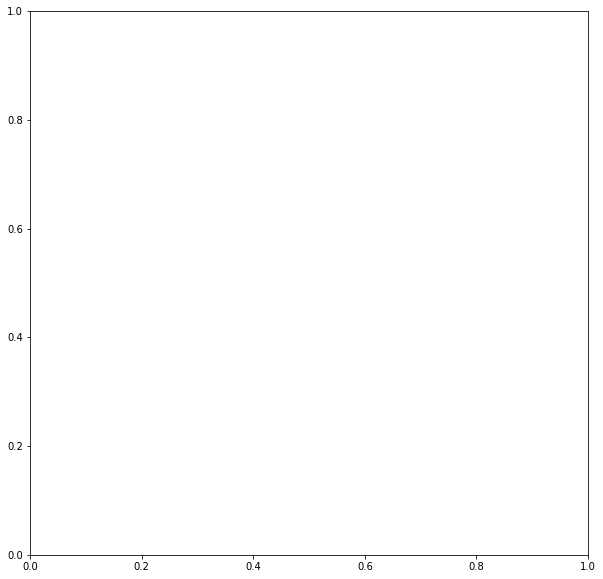

In [ ]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from research_module import *
from firewalls import *
from paritition import *
from point import Point
from plot import*


# fig, ax = plt.subplots(2, figsize=(4,7))
connect_distance = 1
fig, ax = plt.subplots(figsize=(10,10))

# ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Preparing the poisson distribution pibts
# Simulation window parameters
xMin = 0
xMax = 20
yMin = 0
yMax = 20
xDelta = xMax-xMin
yDelta = yMax-yMin  # rectangle dimensions
areaTotal = xDelta*yDelta

lambda0 = 2
numbPoints = (scipy.stats.poisson(lambda0*areaTotal).rvs())
x = np.load('x.npy', allow_pickle=True)
y = np.load('y.npy', allow_pickle=True)
numbPoints = len(x)

In [ ]:
array_of_points = []

for i in range(numbPoints):
    """
    The last index of the point object indecates the state of the point:
    0: Firewall
    1: Normal 
    2: Protected --> protects itself and it's edges (not a firewall) <---- this is used in the second approach of firewalls
    -----------------------------------
    Initially we'll initilize the poitns with no groups
    """
    array_of_points.append(Point(None, i, x[i], y[i], 1, 0)
                           )


len(array_of_points)

388

In [ ]:
edge_matrix = form_edge_matrix(array_of_points, connect_distance)


In [ ]:
desired_number_of_firewalls = 30
min_points_per_cluster = 20

In [ ]:
possible_number_of_clusters = [i for i in range(
    2, int(numbPoints/min_points_per_cluster))]

In [13]:
%reload_ext autoreload
high = len(possible_number_of_clusters)-1
low = 0

cluster_to_firewalls_buffer = []
array_of_groups = []
groups_ = []

while low <= high:

    #select the candidate clusters for bisection
    mid = int((low+high)/2)
    candidate_number_of_clusters = possible_number_of_clusters[mid]

    #-----------------------------------------------------------------------------------------
    #set up the the groups so we can find the firewalls required
    groups_ = divide_even_clusters(x, y, candidate_number_of_clusters)

    for i in range(numbPoints):
        array_of_points[i].group = groups_[i]

    # we prepare the array that holds all the groups with their points
    array_of_groups = get_cluster_points(
        candidate_number_of_clusters, array_of_points)

    for group in array_of_groups:
        group.find_connected_groups()
    #-----------------------------------------------------------------------------------------

    #start multiway partitioning
    queue = [[group1.name, group2]
         for group1 in array_of_groups for group2 in array_of_groups[group1.name].connectedGroup]

    counter = 0
    for group1, group2 in queue:
        print(f'multi{counter}')
        indicator = two_way(
            array_of_groups[group1], array_of_groups[group2], groups_)
        if indicator > 0:
            queue += [[group1, group3] for group3 in array_of_groups[group1].connectedGroup
                    ] + [[group2, group3] for group3 in array_of_groups[group2].connectedGroup]
            array_of_groups[group1].find_connected_groups()
            array_of_groups[group2].find_connected_groups()
        counter+=1


    #update the current graph formulation
    for group in array_of_groups:
        group.find_connected_groups()

    #start oneway partitioning
    queue = [[group1.name, group2]
         for group1 in array_of_groups for group2 in array_of_groups[group1.name].connectedGroup]


    for group1, group2 in queue:
        print(f'single{counter}')
        indicator = single_way(
            array_of_groups[group1], array_of_groups[group2], groups_, numbPoints/candidate_number_of_clusters)
        if indicator > 0:
            queue += [[group1, group3] for group3 in array_of_groups[group1].connectedGroup
                    ] + [[group2, group3] for group3 in array_of_groups[group2].connectedGroup]
            array_of_groups[group1].find_connected_groups()
            array_of_groups[group2].find_connected_groups()
        counter+=1

    for group in array_of_groups:
        group.find_connected_groups()
    
    firewalls, edges = find_firewalls(array_of_groups, protect='self')
    cluster_to_firewalls_buffer.append(
        (f'clusters: {candidate_number_of_clusters}', f'firewalls: {len(firewalls)}'))

    # binary tree updates
    if len(firewalls) >= desired_number_of_firewalls:
        high = mid - 1
    else:
        low = mid + 1

multi0
multi1
multi2
multi3
multi4
multi5
multi6
multi7
multi8
multi9
multi10
multi11
multi12
multi13
multi14
multi15
multi16
multi17
multi18
multi19
multi20
multi21
multi22
multi23
multi24
multi25
multi26
multi27
multi28
multi29
multi30
multi31
multi32
multi33
multi34
multi35
multi36
multi37
multi38
multi39
multi40
multi41
multi42
multi43
multi44
multi45
multi46
multi47
multi48
multi49
multi50
multi51
multi52
multi53
multi54
multi55
multi56
multi57
multi58
multi59
multi60
multi61
multi62
multi63
multi64
multi65
multi66
multi67
multi68
multi69
single70
single71
single72
single73
single74
single75
single76
single77
single78
single79
single80
single81
single82
single83
single84
single85
single86
single87
single88
single89
single90
single91
single92
single93
single94
single95
single96
single97
single98
single99
single100
single101
single102
single103
single104
single105
single106
single107
single108
single109
single110
single111
single112
single113
single114
single115
single116
single117


KeyboardInterrupt: 

[('clusters: 10', 'firewalls: 7'), ('clusters: 14', 'firewalls: 10'), ('clusters: 16', 'firewalls: 13'), ('clusters: 17', 'firewalls: 11'), ('clusters: 18', 'firewalls: 22')]
{(7, 8), (8, 10), (7, 8)}
group_name: 0, #points, 19 dif_ori_cut: 2, connected_groups {11, 5, 6, 15}
group_name: 1, #points, 23 dif_ori_cut: -2, connected_groups {16, 15}
group_name: 2, #points, 23 dif_ori_cut: -2, connected_groups {8, 13, 15}
group_name: 3, #points, 22 dif_ori_cut: -1, connected_groups {17, 12}
group_name: 4, #points, 19 dif_ori_cut: 2, connected_groups set()
group_name: 5, #points, 23 dif_ori_cut: -2, connected_groups {0}
group_name: 6, #points, 23 dif_ori_cut: -2, connected_groups {0, 17}
group_name: 7, #points, 19 dif_ori_cut: 2, connected_groups {13}
group_name: 8, #points, 23 dif_ori_cut: -2, connected_groups {2, 13}
group_name: 9, #points, 22 dif_ori_cut: -1, connected_groups {16}
group_name: 10, #points, 21 dif_ori_cut: 0, connected_groups {17}
group_name: 11, #points, 20 dif_ori_cut: 1, c

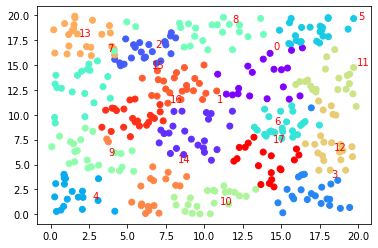

In [ ]:
ax.clear()

plot_points(ax, x, y, groups_, array_of_groups)
# plot_edges(a/x, array_of_groups)
# plot_firewalls(ax, array_of_groups, protect='self')
print(cluster_to_firewalls_buffer)

for group in array_of_groups:
    if group.name == 1:
        print(group.outerPoints)


for group in array_of_groups:
    x_ = list(group.points)[1].x
    y_ = list(group.points)[1].y
    print('group_name: {}, #points, {} dif_ori_cut: {}, connected_groups {}'.format(group.name, len(group.points), (int(numbPoints /
          int(cluster_to_firewalls_buffer[-1][0].split(':')[1])) - len(group.points)), (group.connectedGroup)))
    ax.annotate(f'{group.name}', xy=(x_, y_), color='red',
                 xytext=(10, 10), textcoords="offset points")

print(numbPoints, int(int(numbPoints/int(cluster_to_firewalls_buffer[-1][0].split(':')[1]))*1.1),
      int((numbPoints/int(cluster_to_firewalls_buffer[-1][0].split(':')[1]))*0.9))

fig